In [1]:
import os
import cv2
import random
from imutils import paths

import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
random.seed(42)

In [4]:
data=[]
labels=[]
image_path= sorted(list(paths.list_images('data')))

random.shuffle(image_path)

for path in image_path:
    image= cv2.imread(path)
    image= cv2.resize(image,(64,64))    
    data.append(image)
    
    label= path.split(os.path.sep)[1]
    labels.append(label)

data=np.array(data,dtype='float')/255
labels=np.array(labels)

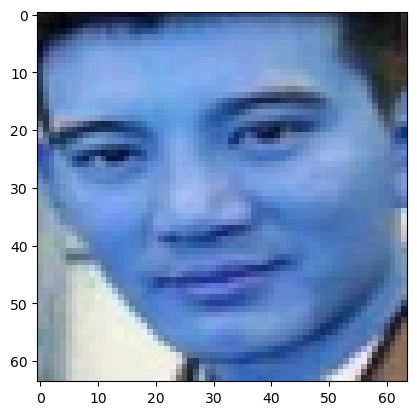

In [5]:
plt.imshow(data[6900])

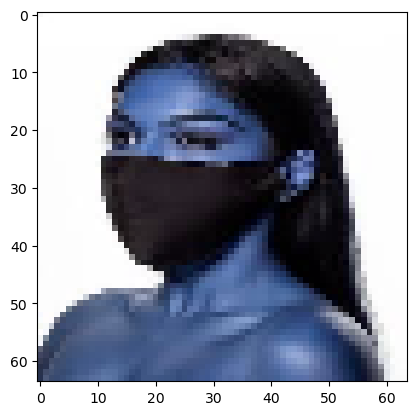

In [6]:
plt.imshow(data[30])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [8]:
def check_shape(df):
    print(df.shape)

In [9]:
print('x_trainig_shape')
check_shape(x_train)
print('x_test_shape')
check_shape(x_test)
print('Y_training_shape')
check_shape(y_train)
print('Y_test_shape')
check_shape(y_test)

x_trainig_shape
(6042, 64, 64, 3)
x_test_shape
(1511, 64, 64, 3)
Y_training_shape
(6042,)
Y_test_shape
(1511,)


In [10]:
cnn=tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [11]:
opti='adam'
loss='binary_crossentropy'
epoch=20
batch_size=32
metrics= ['accuracy']

In [12]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [16]:
hist=cnn.fit(x_train,y_train,epochs=epoch,validation_data=(x_test,y_test),batch_size=batch_size)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7877 - loss: 0.4363 - val_accuracy: 0.9206 - val_loss: 0.2038
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9272 - loss: 0.2037 - val_accuracy: 0.9318 - val_loss: 0.1939
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9428 - loss: 0.1637 - val_accuracy: 0.9332 - val_loss: 0.1759
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9570 - loss: 0.1223 - val_accuracy: 0.9471 - val_loss: 0.1426
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9625 - loss: 0.1046 - val_accuracy: 0.9504 - val_loss: 0.1462
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9693 - loss: 0.0826 - val_accuracy: 0.9444 - val_loss: 0.1436
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9779 - loss: 0.0576 - val_accuracy: 0.9504 - val_loss: 0.1455
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9830 - loss: 0.0533 - val_accu

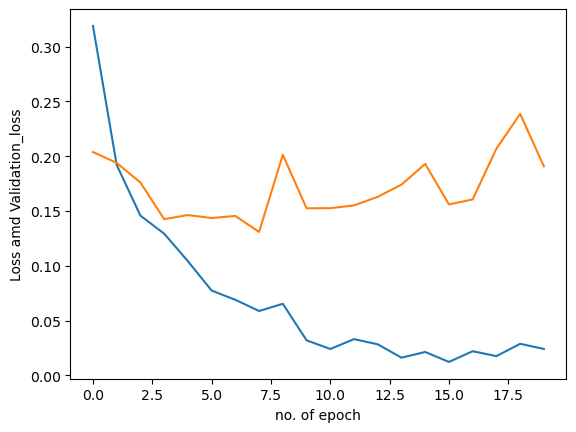

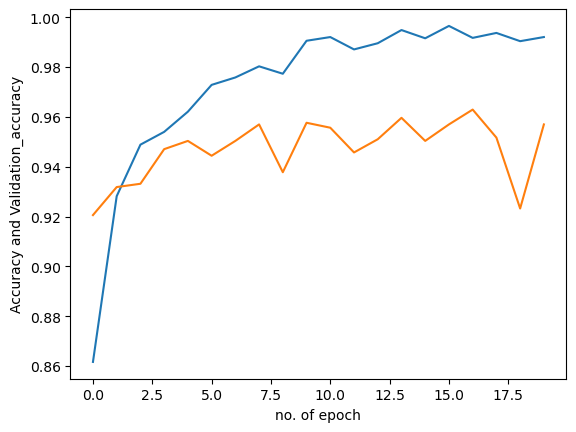

In [17]:
n=np.arange(0,epoch)

plt.figure()
plt.plot(n,hist.history['loss'],label='Loss')
plt.plot(n,hist.history['val_loss'],label='Validation_loss')
plt.xlabel('no. of epoch')
plt.ylabel('Loss amd Validation_loss')

plt.figure()
plt.plot(n,hist.history['accuracy'],label='Accuracy')
plt.plot(n,hist.history['val_accuracy'],label='validation_accuracy')
plt.xlabel('no. of epoch')
plt.ylabel('Accuracy and Validation_accuracy')
plt.legend;


In [18]:
cnn.evaluate(x_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9594 - loss: 0.1939


[0.1907554715871811, 0.9569821357727051]

1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted: [0.9999899]


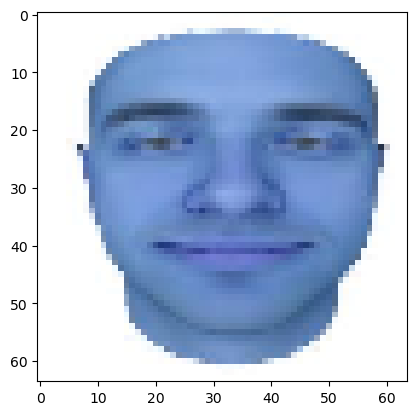

In [21]:
i = random.randint(0, len(x_test))
plt.imshow(x_test[i])
print(y_test[i])

pred = cnn.predict(np.expand_dims(x_test[i], axis=0))[0]
print("Predicted:", pred)